

---



---


# Regularized Linear Models



---



---
Regularized linear models, such as Ridge and Lasso Regression, add penalties to the linear regression cost function to prevent overfitting by shrinking the coefficients. They are effective for high-dimensional datasets and handle multicollinearity well, providing a balance between simplicity and accuracy in regression tasks.

The main types of regularized linear models are:

- **Ridge Regression (Ridge)**:
  - `Ridge` regression is a linear regression model that uses L2 regularization to prevent overfitting by penalizing large coefficients.
  - [scikit Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

- **Lasso Regression (Lasso)**:
  - `Lasso` regression is similar to Ridge regression but uses L1 regularization, leading to sparse coefficient solutions by encouraging feature selection.
  - [scikit Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

- **Elastic Net Regression (ElasticNet)**:
  - `ElasticNet` is a combination of Ridge and Lasso regression, using a mix of L1 and L2 regularization. It balances between feature selection and regularization.
  - [scikit Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

These models offer different trade-offs between bias and variance, providing flexibility in regression tasks. Refer to the documentation links for detailed information on usage, parameters, and examples.

In this notebook, we explore regularized linear models like Ridge, Lasso, and Elastic Net, comparing their performance and implementing early stopping to prevent overfitting.


#Setup

In [1]:
# Common imports for numerical operations and file system tasks
import numpy as np
import sklearn
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Establish a fixed random seed for consistent reproducibility in random processes
np.random.seed(42)




---



---


#Ridg Regression



---



---

Ridge Regression (L2 regularization)
 Adds the squared magnitude of coefficients to the cost function.

   Cost Function:

   J(θ) = MSE(θ) + α * Σ(θ_i)^2
   
   where MSE(θ) is the mean squared error, α is the regularization strength, and θ_i are the model coefficients.


In [2]:
# Generating synthetic data for linear regression
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Define number of samples
m = 20

# Generate feature values in range [0, 3]
X = 3 * np.random.rand(m, 1)

# Generate target values with linear relationship to features
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

# Generate new feature values for prediction
X_new = np.linspace(0, 3, 100).reshape(100, 1)


In [3]:
from sklearn.linear_model import Ridge

# Create and configure the Ridge Regression model with alpha=1, solver="cholesky"
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)

# Fit the model to the data
ridge_reg.fit(X, y)

# Make predictions
ridge_reg.predict([[1.5]])


array([[1.55071465]])

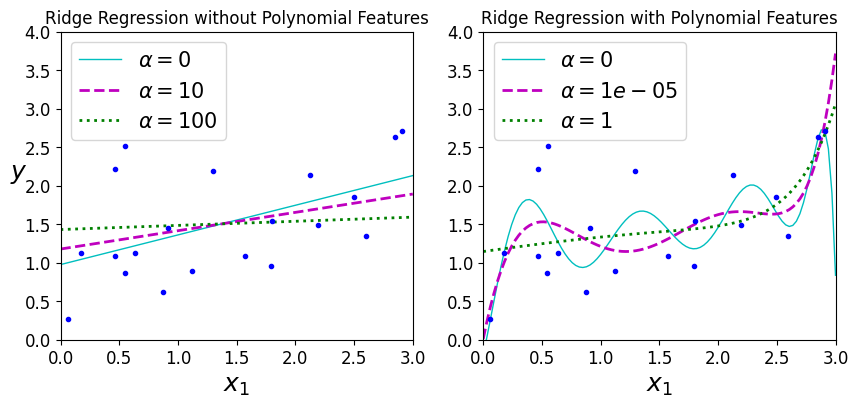

<Figure size 640x480 with 0 Axes>

In [7]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
    # Iterate over different alpha values
    for alpha, style in zip(alphas, ("c-", "m--", "g:")):
        # Create Ridge regression model with specified alpha
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            # If polynomial regression, create a pipeline with polynomial features and standard scaler
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        # Fit the model to the data
        model.fit(X, y)
        # Make predictions for a range of input values
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        # Plot the model's predictions
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    # Plot the original data points
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

# Create a figure with two subplots
plt.figure(figsize=(10,4))
plt.subplot(121)
# Plot Ridge regression models without polynomial features
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title("Ridge Regression without Polynomial Features")

plt.subplot(122)
# Plot Ridge regression models with polynomial features
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.title("Ridge Regression with Polynomial Features")

# Display the plot
plt.show()
plt.tight_layout()


**SGDRegressor**:
  - `SGDRegressor` implements linear regression with stochastic gradient descent (SGD) learning. It is suitable for large-scale and sparse data. 
  - [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [ ]:
from sklearn.linear_model import SGDRegressor

# Create and configure the SGDRegressor model
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)

# Fit the model to the data
sgd_reg.fit(X, y.ravel())

# Make predictions
sgd_reg.predict([[1.5]])

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [ ]:
from sklearn.linear_model import SGDRegressor

# Create and configure the SGDRegressor model with L2 regularization
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)

# Fit the model to the data
sgd_reg.fit(X, y.ravel())

# Make predictions
sgd_reg.predict([[1.5]])


array([1.47012588])



---



---

#Lasso Regression

---



---


Lasso Regression (L1 regularization) Adds the absolute value of coefficients to the cost function.


   Cost Function:


   J(θ) = MSE(θ) + α * Σ|θ_i|
   
   where |θ_i| represents the absolute value of the coefficients.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


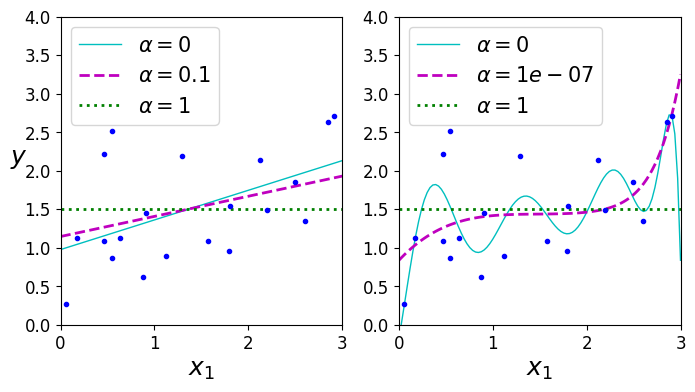

In [ ]:
# Plotting Lasso Regression with different settings
from sklearn.linear_model import Lasso

# Plotting non-polynomial Lasso Regression
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)

# Plotting polynomial Lasso Regression
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()


In [ ]:
from sklearn.linear_model import Lasso

# Create and configure the Lasso Regression model with alpha=0.1
lasso_reg = Lasso(alpha=0.1)

# Fit the model to the data
lasso_reg.fit(X, y)

# Make predictions
lasso_reg.predict([[1.5]])



array([1.53788174])

#ElasticNet


Elastic Net combines both L2 and L1 penalties to the cost function, allowing for a mixture of Ridge and Lasso regularization.. It is useful when dealing with high-dimensional datasets where multiple features may be correlated with each other.

 Cost Function:


   J(θ) = MSE(θ) + rα * Σ|θ_i| + ((1 - r) / 2) * α * Σ(θ_i)^2


   where r is the mix ratio between L1 and L2 regularization, α is the regularization strength, and θ_i are the model coefficients.

In [ ]:
from sklearn.linear_model import ElasticNet

# Create an ElasticNet model with specified alpha, l1_ratio, and random state
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

# Fit the model to the data
elastic_net.fit(X, y)

# Make predictions for a new data point
elastic_net.predict([[1.5]])

array([1.54333232])

#Early Stopping

In [ ]:

from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

# Generate data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

# Split data
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)


In [ ]:
from sklearn.metrics import mean_squared_error
from copy import deepcopy

# Pipeline for polynomial feature scaling
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

# Apply polynomial feature scaling to training and validation sets
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# Initialize SGDRegressor with warm_start=True for incremental learning
sgd_reg = SGDRegressor(max_iter=1, tol=1e-3, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

# Initialize variables to track best model and error
minimum_val_error = float("inf")
best_epoch = None
best_model = None

# Train SGDRegressor and track validation error
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # Continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)

    # Update minimum validation error and best model
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stocha

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stocha

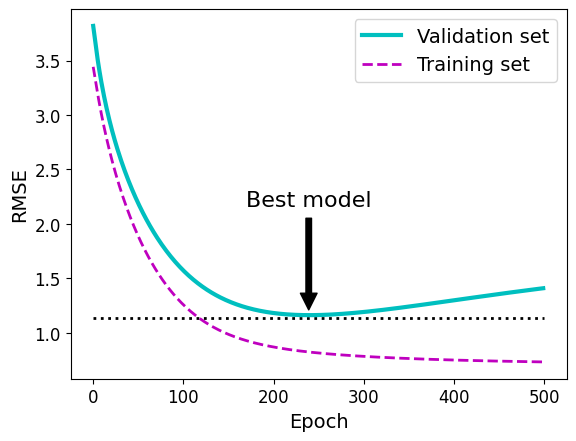

In [ ]:
sgd_reg = SGDRegressor(max_iter=1, tol=1e-3, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []

# Train SGDRegressor for a specified number of epochs and track errors
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

# Find the epoch with the minimum validation error and corresponding RMSE
best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

# Annotate the plot with the best model
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

# Adjust the position of the best validation RMSE for better visualization
best_val_rmse -= 0.03
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)

# Plot RMSE for both training and validation sets
plt.plot(np.sqrt(val_errors), "c-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "m--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()


In [ ]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, warm_start=True))